In [20]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
#from sklearn.metrics import silhouette_score

from sklearn import metrics
#from sklearn.metrics import pairwise_distances_argmin_min 

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

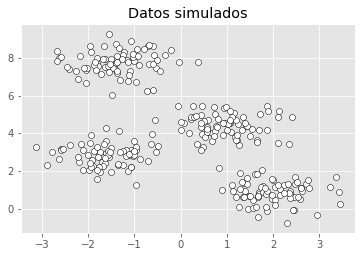

In [4]:
from sklearn.datasets import make_blobs
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

In [21]:
# Data y Escalamiento
# ==============================================================================
X_scaled = scale(X)

In [37]:
# Configuración Kmeans
numCluster = range(3, 7)
l_mod_KMeans = ['Kmeans_NCluster'+str(i) for i in numCluster]
iter_KMeans = [KMeans(n_init=5, n_clusters=i, random_state=123) for i in numCluster]

In [38]:
# Configuración DBSCAN
numSam = range(4, 11)
l_mod_DBSCAN = ['DBSCAN_nSample'+str(i) for i in numSam]
iter_DBSCAN = [DBSCAN(eps=0.25, min_samples=i, n_jobs = -1) for i in numSam]

In [77]:
# Configuracion Jerarquico
l_linkage = ['complete', 'average', 'ward']
numCluster = range(3, 7)
#l_mod_HClust = ['HClust_'+str(i)+'_'+str(j) for i in l_linkage]
l_mod_HClust = []
for i in l_linkage:
    for j in numCluster:
        l_mod_HClust = l_mod_HClust + ['HClust_'+str(i)+'_NCluster'+str(j)]
#iter_HClust = [AgglomerativeClustering(affinity = 'euclidean',linkage  = i,distance_threshold = 0,n_clusters = None) for i in l_linkage]
iter_HClust = []
for i in l_linkage:
    for j in numCluster:
        iter_HClust = iter_HClust + [AgglomerativeClustering(affinity = 'euclidean',linkage  = i,n_clusters = j)]

In [78]:
iter_model = iter_KMeans + iter_DBSCAN + iter_HClust
list_mod = l_mod_KMeans + l_mod_DBSCAN + l_mod_HClust
print('Cantidad de modelos:',len(iter_model))
print(list_mod)

Cantidad de modelos: 23
['Kmeans_NCluster3', 'Kmeans_NCluster4', 'Kmeans_NCluster5', 'Kmeans_NCluster6', 'DBSCAN_nSample4', 'DBSCAN_nSample5', 'DBSCAN_nSample6', 'DBSCAN_nSample7', 'DBSCAN_nSample8', 'DBSCAN_nSample9', 'DBSCAN_nSample10', 'HClust_complete_NCluster3', 'HClust_complete_NCluster4', 'HClust_complete_NCluster5', 'HClust_complete_NCluster6', 'HClust_average_NCluster3', 'HClust_average_NCluster4', 'HClust_average_NCluster5', 'HClust_average_NCluster6', 'HClust_ward_NCluster3', 'HClust_ward_NCluster4', 'HClust_ward_NCluster5', 'HClust_ward_NCluster6']


In [79]:
modCluster = [iter_model[i].fit(X) for i in range(len(iter_model))]
cluster = [modCluster[i].labels_ for i in range(len(modCluster))] 

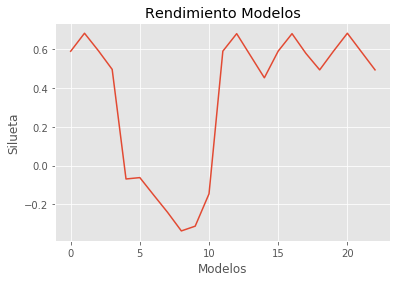

In [85]:
silhou  = [metrics.silhouette_score(X, cluster[i]) for i in range(len(modCluster))] 
calinski = [metrics.calinski_harabasz_score(X, cluster[i]) for i in range(len(modCluster))] 
davies_bouldin = [metrics.davies_bouldin_score(X, cluster[i]) for i in range(len(modCluster))] 

plt.plot(silhou)
plt.xlabel('Modelos')
plt.ylabel('Silueta')
plt.title('Rendimiento Modelos')
plt.show()

In [86]:
tabla = {'Modelo':list_mod,'silhouette_score':silhou, 'calinski': calinski, 'davies_bouldin':davies_bouldin}

df_reporte = pd.DataFrame(tabla)
df_reporte

,Modelo,silhouette_score,calinski,davies_bouldin
0,Kmeans_NCluster3,0.589039,615.093327,0.626272
1,Kmeans_NCluster4,0.681994,1210.089914,0.437564
2,Kmeans_NCluster5,0.592303,1024.567544,0.695859
3,Kmeans_NCluster6,0.495634,908.472471,0.886531
4,DBSCAN_nSample4,-0.069203,37.958443,2.028405
5,DBSCAN_nSample5,-0.062177,40.211050,2.480442
6,DBSCAN_nSample6,-0.152170,33.823919,2.318212
7,DBSCAN_nSample7,-0.240769,18.816829,2.553937
8,DBSCAN_nSample8,-0.336973,19.105859,1.536644
9,DBSCAN_nSample9,-0.312550,8.888784,1.839325


In [ ]:
# Modelo GMMs 
# ==============================================================================
modelo_gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
modelo_gmm.fit(X=X)

In [ ]:
# Probabilidades
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
probabilidades = modelo_gmm.predict_proba(X)
probabilidades

In [ ]:
# Clasificación (asignación a la componente de mayor probabilidad)
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
clasificacion = modelo_gmm.predict(X)
clasificacion

In [ ]:
n_components = range(1, 21)
valores_bic = []
valores_aic = []

for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full")
    modelo = modelo.fit(X)
    valores_bic.append(modelo.bic(X))
    valores_aic.append(modelo.aic(X))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_components, valores_bic, label='BIC')
ax.plot(n_components, valores_aic, label='AIC')
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [4]:
from sklearn.metrics import calinski_harabasz_score, calinski_harabasz_score, silhouette_score, davies_bouldin_score

data = [
    [5.1, 3.5, 1.4, 0.2],
    [4.9, 3. , 1.4, 0.2],
    [4.7, 3.2, 1.3, 0.2],
    [4.6, 3.1, 1.5, 0.2],
    [5. , 3.6, 1.4, 0.2],
    [5.4, 3.9, 1.7, 0.4],
]
clusters = [1, 1, 2, 2, 3, 3]

In [5]:
silhouette = silhouette_score(data, clusters, metric="euclidean")
calinski = calinski_harabasz_score(data, clusters)
davies_bouldin = davies_bouldin_score(data, clusters)

In [6]:
print('Indice silhouette:',silhouette)
print('Indice calinski:',calinski)
print('Indice davies_bouldin:',davies_bouldin)

Indice silhouette: 0.011865350778267586
Indice calinski: 3.1506849315068473
Indice davies_bouldin: 1.0564096159143739
